1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.
2. Investigate missing data and outliers.
3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.
5. Using the dependent variable, perform both min-max and standard scaling in Python.

# Understand summary data
# 1.Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [74]:
import pandas as pd
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib # import matplotlib
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import io

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div class="alert alert-block alert-info">   <b>
1. There are 80 columns
2. Some columns have too many null values - E.g. - PoolQC
3. We can build a hypothesis that Sale Price would be correlated to some variables like - Overall Quality, Garage and Locality. We may revisit these as we get evidences </b></div>


Summary Stats of numeric columns

In [76]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [77]:
len(df.index)

1460

# 2.Investigate missing data and outliers

In [78]:
pd.DataFrame(df.isnull().sum())[0].sort_values(ascending = False)/len(df.index)


PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Name: 0, Length: 81, dtype: float64

In [79]:
#handle null values
df['LotFrontage'].isnull().sum()
df['LotFrontage'].fillna(df.LotFrontage.median(),inplace = True)
df['LotFrontage'].isnull().sum()

df['MasVnrArea'].isnull().sum()
df['MasVnrArea'].fillna(df.MasVnrArea.median(),inplace = True)
df['MasVnrArea'].isnull().sum()

df['GarageYrBlt'].isnull().sum()
df['GarageYrBlt'].fillna(df.GarageYrBlt.median(),inplace = True)
df['GarageYrBlt'].isnull().sum()

#For categorical variable - based on frequency
df['GarageType'].isnull().sum()
df['GarageType'].value_counts()
#Attchd type is highest frequency. So we'll replace the null values with 'Attchd'
df['GarageType'].fillna('Attchd',inplace = True)
df['GarageType'].value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

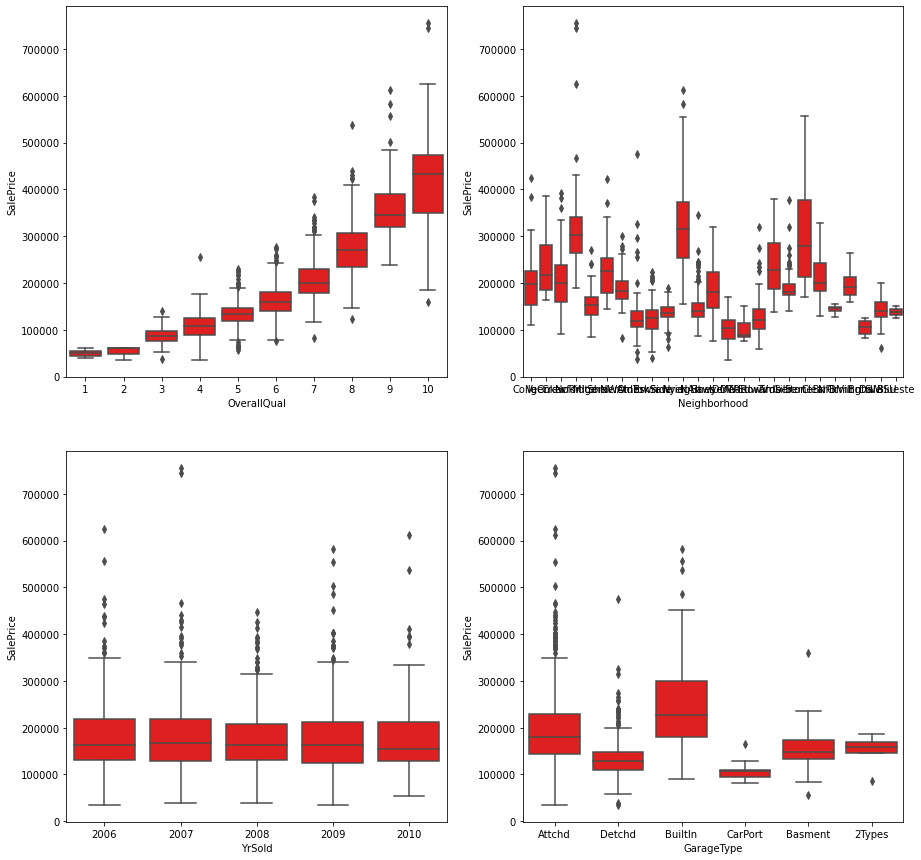

In [80]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(x=df['OverallQual'], y=df['SalePrice'],ax=axes[0,0], color = "red")
sns.boxplot(x=(df['Neighborhood']), y=df['SalePrice'],ax=axes[0,1],color = "red")
sns.boxplot(x=df['YrSold'], y=df['SalePrice'],ax=axes[1,0],color = "red")
sns.boxplot(x=(df['GarageType']), y=df['SalePrice'],ax=axes[1,1],color = "red")

<AxesSubplot:>

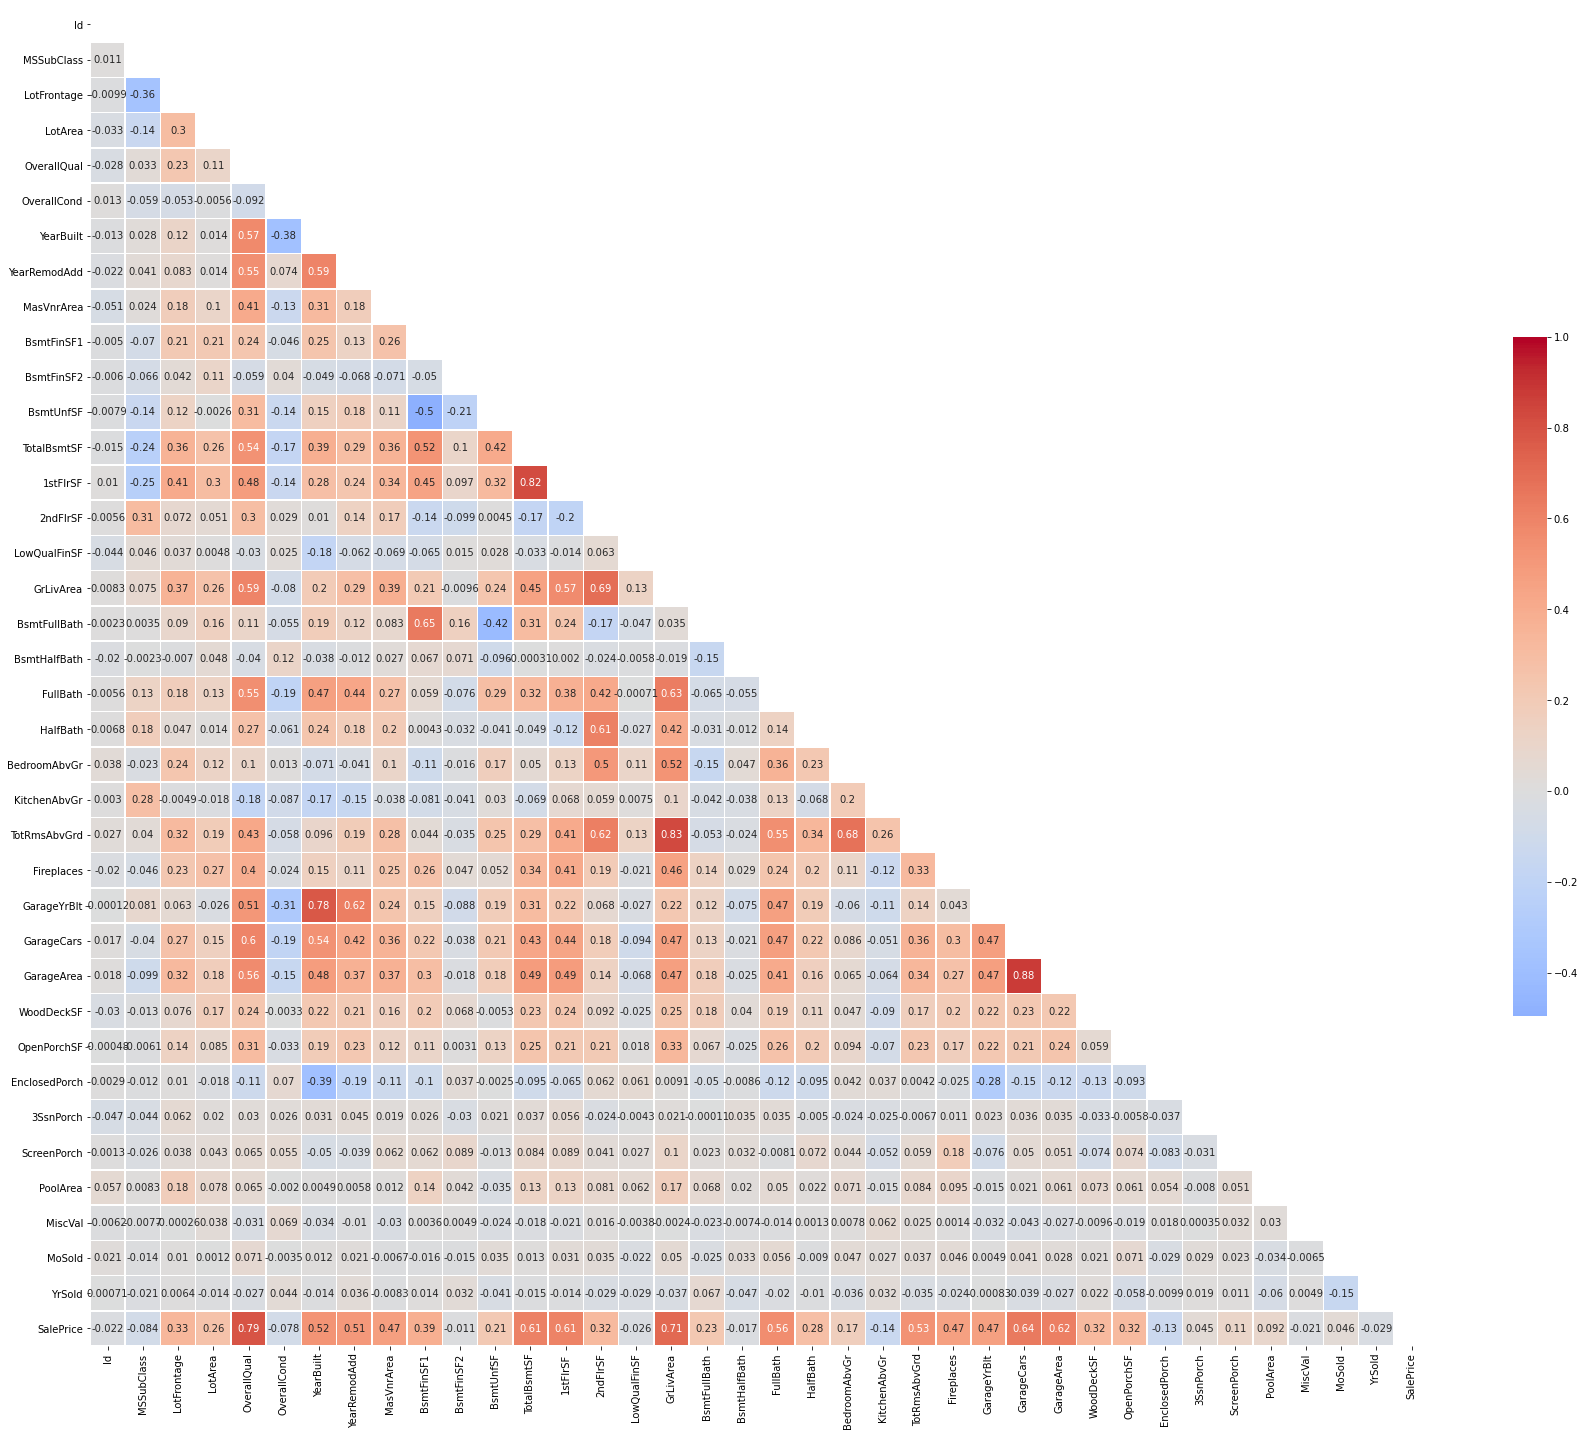

In [81]:
fig, ax = plt.subplots(figsize=(30, 25))
matrix = np.triu(df.corr())

#sns.heatmap(df.corr(), annot=True, mask=matrix)
#cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=matrix, vmax=1, cmap = 'coolwarm',center=0, annot = True, square = True
            , linewidths=.5, cbar_kws={"shrink": .5})

### dark color represent the variables with high correlation

Correlation of these variables with SalePrice is high

1. OverallQual
2. GarageCars
3. GarageArea
4. GrLivArea



<AxesSubplot:xlabel='SalePrice'>

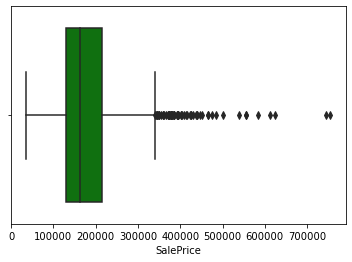

In [82]:
sns.boxplot(x=df['SalePrice'], color = "green")

# Continue -  1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

Dependent variable is the Sale Price. Let us try to understand the visualization  and descriptive statistics of the 'Sale Price'

In [83]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Difference between meand and median where mean>median so we must assume that the distribution of Sale Price is skewed towards right

<AxesSubplot:xlabel='SalePrice'>

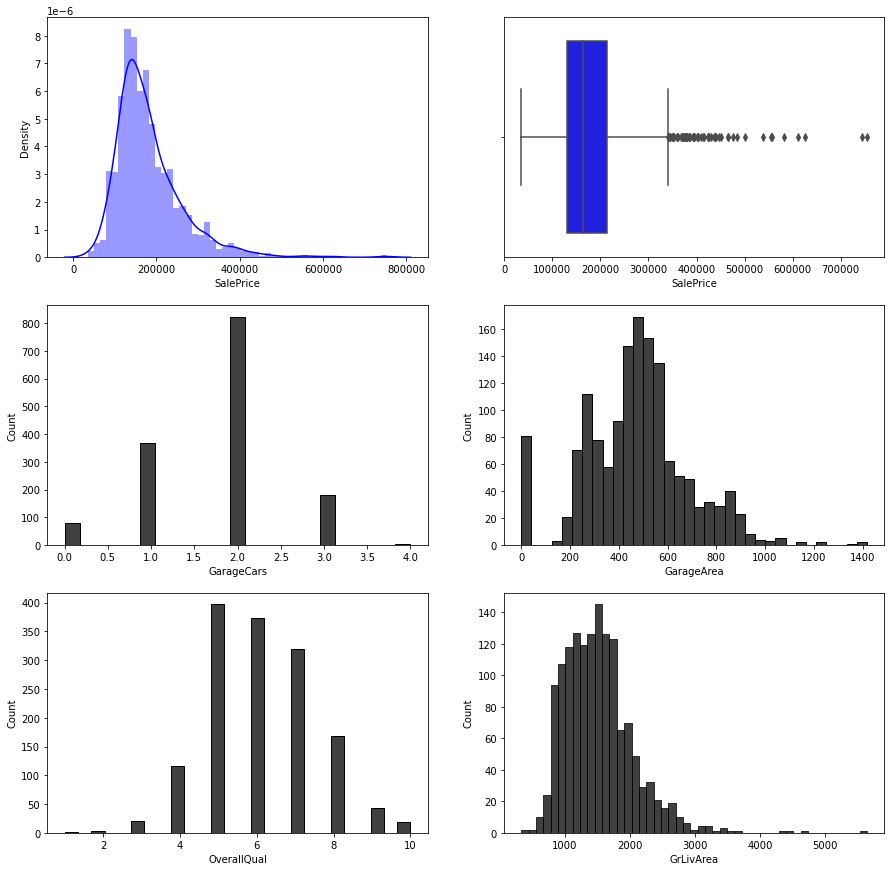

In [84]:
# Plot distribution of course preferances
f, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df["OverallQual"] , color="black", ax=axes[2, 0])
sns.histplot(df["GrLivArea"] , color="black", ax=axes[2, 1])
sns.histplot(df["GarageCars"] , color="black", ax=axes[1, 0])
sns.histplot(df["GarageArea"] , color="black", ax=axes[1, 1])
sns.distplot(df['SalePrice'], color = "blue", ax = axes[0,0])
sns.boxplot(df['SalePrice'], color = "blue", ax = axes[0,1])

# 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

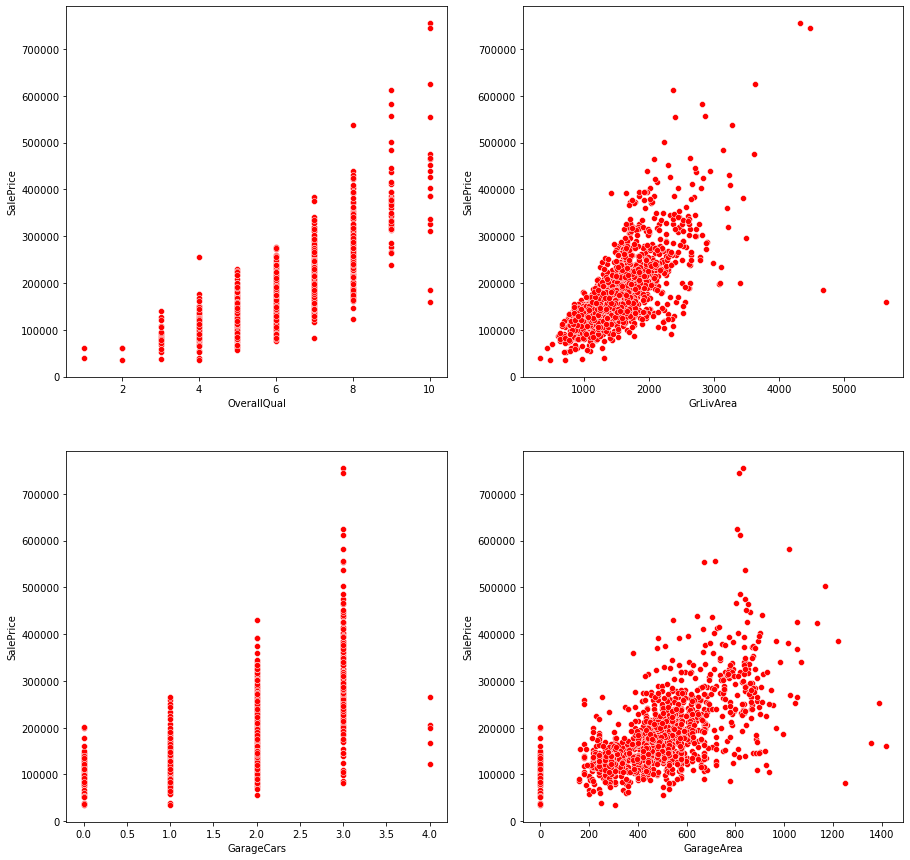

In [85]:
f, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'],ax=axes[0,0], color = "red")
sns.scatterplot(x=(df['GrLivArea']), y=df['SalePrice'],ax=axes[0,1],color = "red")
sns.scatterplot(x=df['GarageCars'], y=df['SalePrice'],ax=axes[1,0],color = "red")
sns.scatterplot(x=(df['GarageArea']), y=df['SalePrice'],ax=axes[1,1],color = "red")

### there looks like a correlation with all these variables as we can see through the visualization

Now we shall look at the influence of categorical variables.
We are looking for some distinct patterns

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

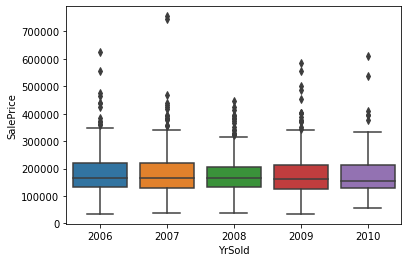

In [86]:
sns.boxplot(x=df['YrSold'], y=df['SalePrice'])

YrSold does not tell us much dependency. Means look similar and distribution also very similar

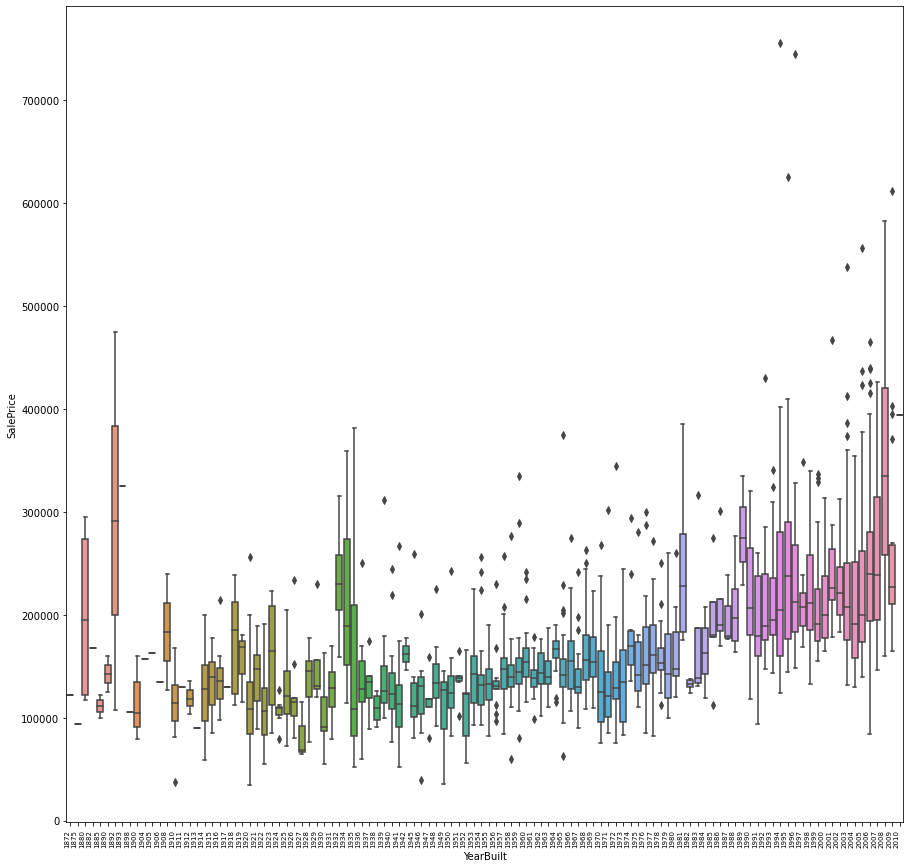

In [87]:
f, axes = plt.subplots(1, figsize=(15, 15))

ax = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize = 7)
plt.show()

In [88]:
dfgrp = df.groupby(by = 'YearBuilt').mean()

<AxesSubplot:xlabel='YearBuilt'>

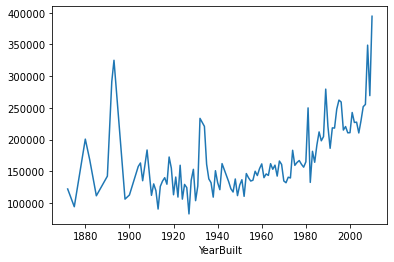

In [89]:
dfgrp['SalePrice'].plot()

<AxesSubplot:xlabel='Neighborhood'>

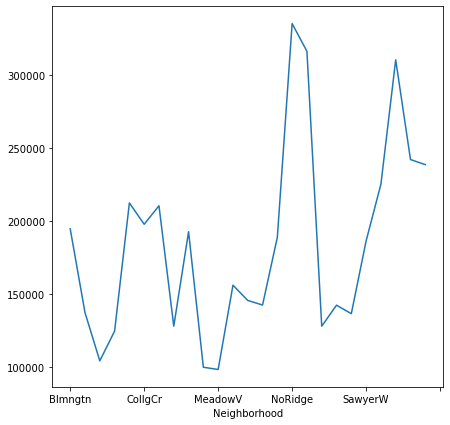

In [103]:
dfgrp = df.groupby(by = 'Neighborhood').mean()
dfgrp['SalePrice'].plot(figsize = (7,7))

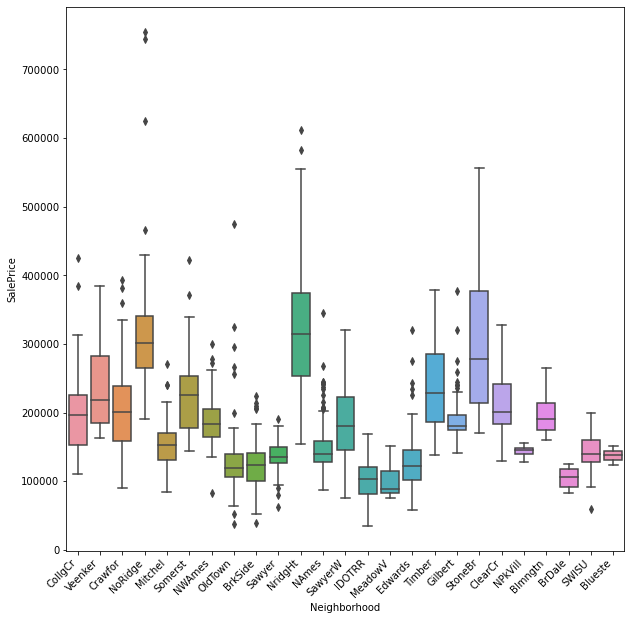

In [91]:
plt.subplots(1,figsize=(10,10))
ax = sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'])


#ax = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize = 10)
plt.show()

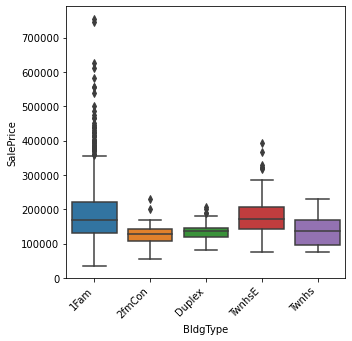

In [92]:
plt.subplots(1,figsize=(5,5))
ax = sns.boxplot(x=df['BldgType'], y=df['SalePrice'] )


#ax = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize = 10)




plt.show()

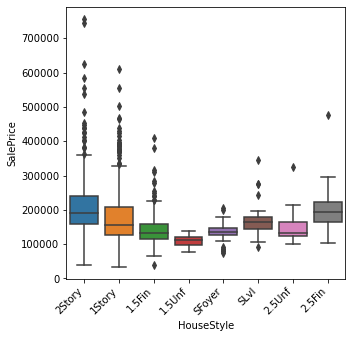

In [93]:
plt.subplots(1,figsize=(5,5))
ax = sns.boxplot(x=df['HouseStyle'], y=df['SalePrice'] )
#ax = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize = 10)
plt.show()

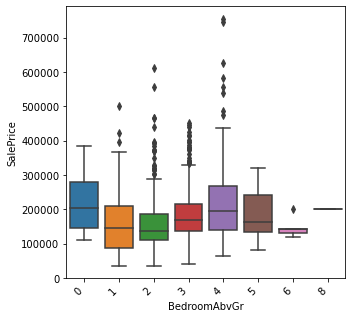

In [94]:
plt.subplots(1,figsize=(5,5))
ax = sns.boxplot(x=df['BedroomAbvGr'], y=df['SalePrice'] )
#ax = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize = 10)
plt.show()

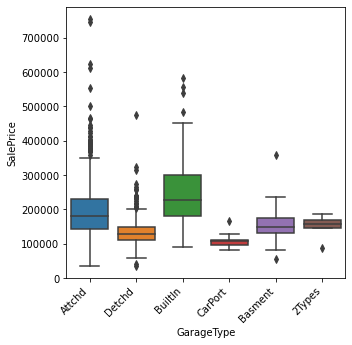

In [95]:
plt.subplots(1,figsize=(5,5))
ax = sns.boxplot(x=df['GarageType'], y=df['SalePrice'] )
#ax = sns.boxplot(x=df['YearBuilt'], y=df['SalePrice'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize = 10)
plt.show()

# 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

<AxesSubplot:xlabel='GarageType'>

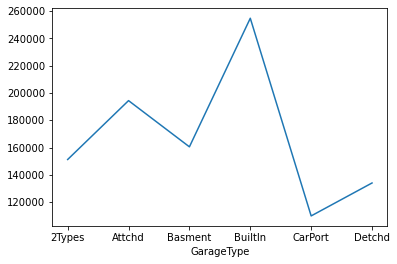

In [96]:
dfgrp = df.groupby(by = 'GarageType').mean()
dfgrp['SalePrice'].plot()

In [97]:
df_enc = pd.get_dummies(df, columns = ['GarageType'])

list_var = ['SalePrice','GarageType_2Types','GarageType_Attchd',
            'GarageType_Basment','GarageType_BuiltIn', 
            'GarageType_CarPort', 'GarageType_Detchd', 
            'OverallQual','GarageCars','GarageArea','GrLivArea']

df2 = df_enc[list_var]
df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   SalePrice           1460 non-null   int64
 1   GarageType_2Types   1460 non-null   uint8
 2   GarageType_Attchd   1460 non-null   uint8
 3   GarageType_Basment  1460 non-null   uint8
 4   GarageType_BuiltIn  1460 non-null   uint8
 5   GarageType_CarPort  1460 non-null   uint8
 6   GarageType_Detchd   1460 non-null   uint8
 7   OverallQual         1460 non-null   int64
 8   GarageCars          1460 non-null   int64
 9   GarageArea          1460 non-null   int64
 10  GrLivArea           1460 non-null   int64
dtypes: int64(5), uint8(6)
memory usage: 65.7 KB


In [98]:
df2.head()

,SalePrice,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,OverallQual,GarageCars,GarageArea,GrLivArea
0,208500,0,1,0,0,0,0,7,2,548,1710
1,181500,0,1,0,0,0,0,6,2,460,1262
2,223500,0,1,0,0,0,0,7,2,608,1786
3,140000,0,0,0,0,0,1,7,3,642,1717
4,250000,0,1,0,0,0,0,8,3,836,2198


# 5. Using the dependent variable, perform both min-max and standard scaling in Python.

Text(0.5, 1.0, 'Unscaled')

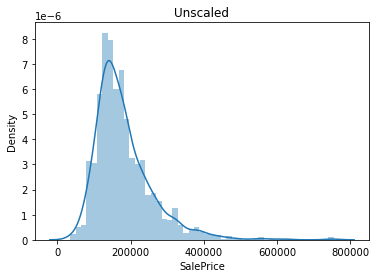

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

y = df2['SalePrice']
sns.distplot(y).set_title('Unscaled')

Text(0.5, 1.0, 'Standard Scaler')

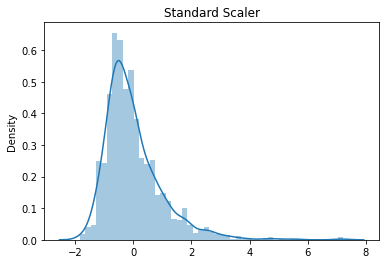

In [100]:
sns.distplot(StandardScaler().fit_transform(np.array(y).reshape(-1,1))).set_title('Standard Scaler')

Text(0.5, 1.0, 'Min/Max Scaler')

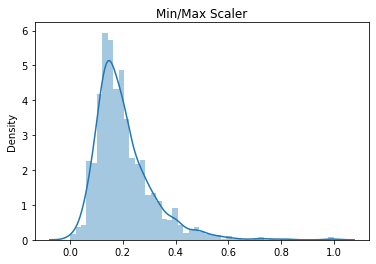

In [101]:
sns.distplot(MinMaxScaler().fit_transform(np.array(y).reshape(-1,1))).set_title('Min/Max Scaler')